# Exemplo de separação regional residual utilizando um ajuste polinomial simples

Este código utiliza a biblioteca de modelagem e inversão de dados geofísicos denominada [Fatiando a Terra](http://www.fatiando.org/index.html).

### Coisas para importar

In [1]:
%matplotlib inline
import numpy as np
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere
from fatiando.vis import mpl

### Pontos onde são calculados os dados

In [2]:
shape = (100, 100) # número de pontos ao longo de x e y
N = shape[0]*shape[1] # número de pontos
area = (-5000, 5000, -5000, 5000) # x mínimo, x máximo, y mínimo e y máximo da área
xp, yp, zp = gridder.regular(area, shape, z=-100) # grade regular localizada em z = -100 m

xc = area[1] - area[0] # coordenadas x do centro da área
yc = area[3] - area[2] # coordenadas y do centro da área

### Campo geomagnético local

In [3]:
inc = -30. # graus
dec = 0. # graus

In [4]:
c0 = 23500.0
c1 = 0.05
c2 = 0.08
amp = c0 + c1*(xp - xc) + c2*(yp - yc) # nT

In [5]:
F = utils.ang2vec(1.0, inc, dec) # versor do campo geomagnético local

In [6]:
print F

[ 0.8660254  0.        -0.5      ]


### Modelo de corpo esférico

In [7]:
model = [mesher.Sphere(0., 0., 700., 500., {'magnetization': utils.ang2vec(10., inc, dec)})]

### Anomalia de campo total (em nT)

In [8]:
bx = sphere.bx(xp, yp, zp, model)
by = sphere.by(xp, yp, zp, model)
bz = sphere.bz(xp, yp, zp, model)

In [9]:
act_aprox = sphere.tf(xp, yp, zp, model, inc, dec)

In [10]:
ct = np.sqrt((amp*F[0] + bx)**2 + (amp*F[1] + by)**2 + (amp*F[2] + bz)**2)

In [11]:
act = ct - amp

### Plot da anomalia de campo total

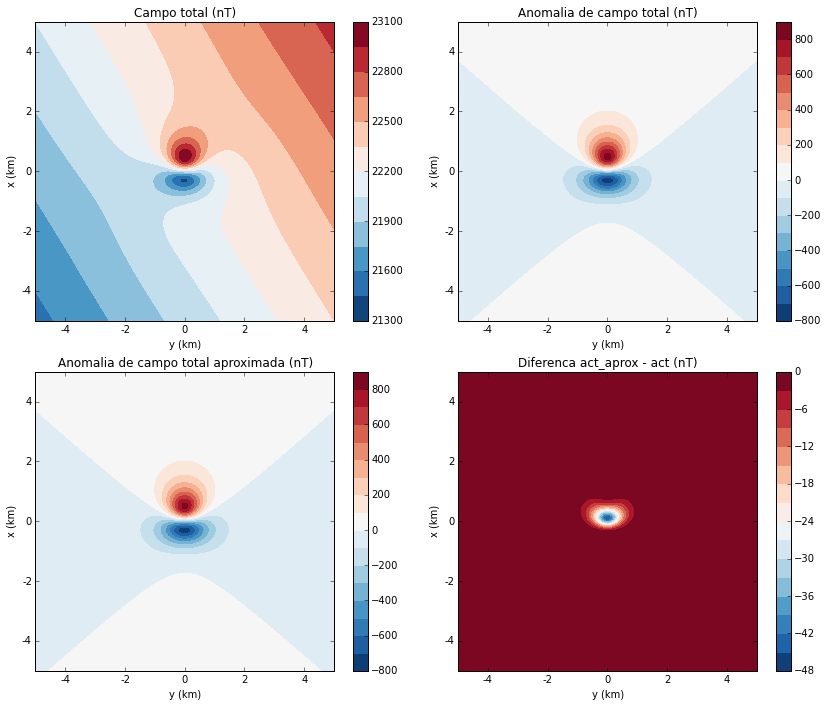

In [12]:
mpl.close('all')
mpl.figure(figsize=(12,10))

mpl.subplot(2,2,1)
mpl.title("Campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, ct, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title("Anomalia de campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title("Anomalia de campo total aproximada (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act_aprox, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title("Diferenca act_aprox - act (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act_aprox - act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(pad = 2.)

mpl.show()

### Ajuste polinomial simples

In [29]:
A = np.vstack((np.ones(N), xp, yp)).T

In [31]:
p = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,ct))

In [32]:
print '           c            p'
print '%12.5f %12.5f' % (c0,p[0])
print '%12.5f %12.5f' % (c1,p[1])
print '%12.5f %12.5f' % (c2,p[2])

           c            p
 23500.00000  22199.57676
     0.05000      0.05260
     0.08000      0.08000


In [34]:
ct_regional = np.dot(A,p)

In [35]:
ct_residual = ct - ct_regional

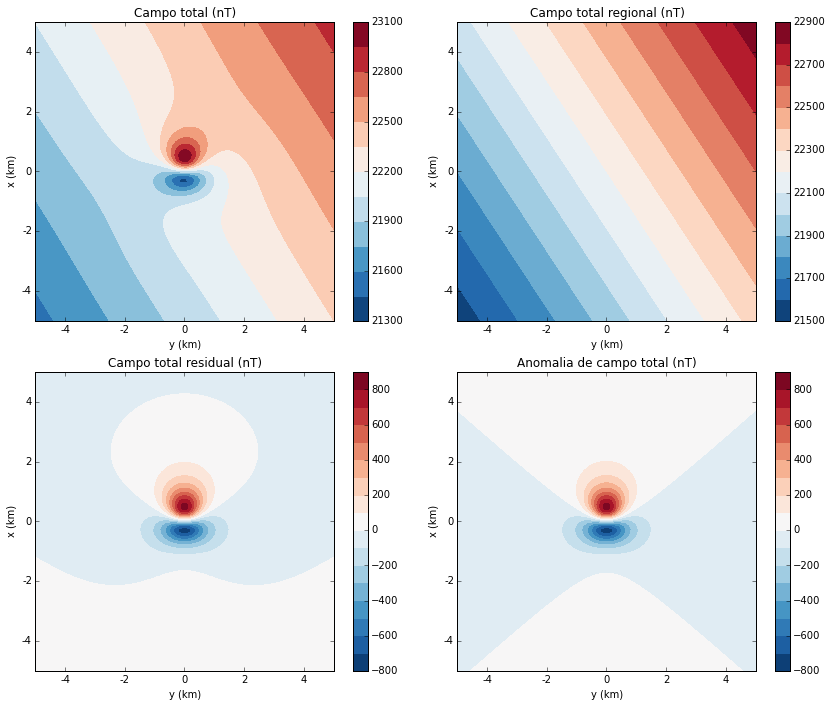

In [36]:
mpl.close('all')
mpl.figure(figsize=(12,10))

mpl.subplot(2,2,1)
mpl.title("Campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, ct, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,2)
mpl.title("Campo total regional (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, ct_regional, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,3)
mpl.title("Campo total residual (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, ct_residual, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.subplot(2,2,4)
mpl.title("Anomalia de campo total (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, act, shape, 15, cmap = mpl.get_cmap('RdBu_r'))
mpl.colorbar()
mpl.xlabel('y (km)')
mpl.ylabel('x (km)')
mpl.m2km()

mpl.tight_layout(pad = 2.)

mpl.show()